
Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_3
## OCSVM

In [3]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019
before = 5
after = 5

In [ ]:
anom

### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2] .reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')


In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 ].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

In [ ]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


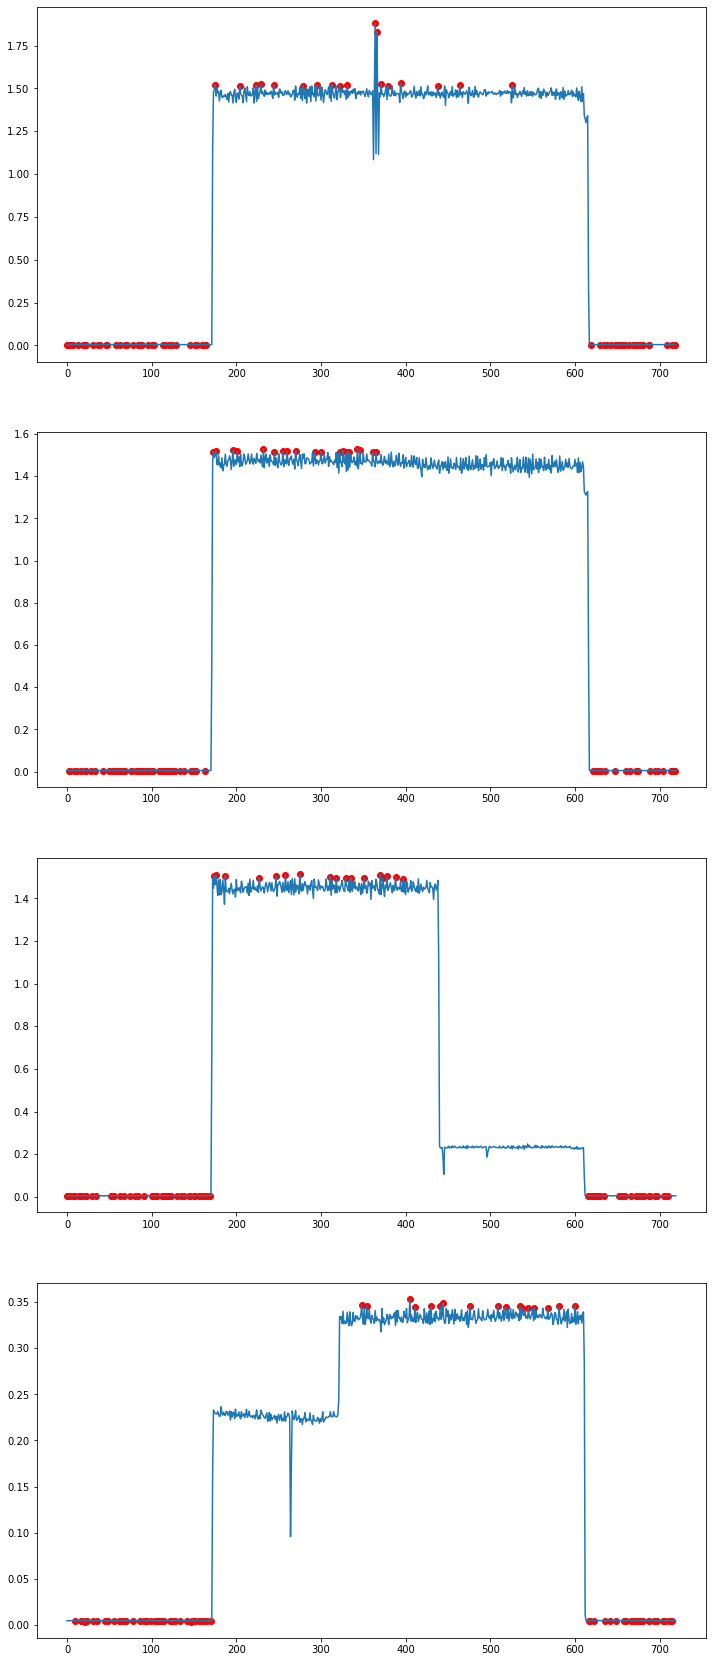

In [33]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs


756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
(4, 720)


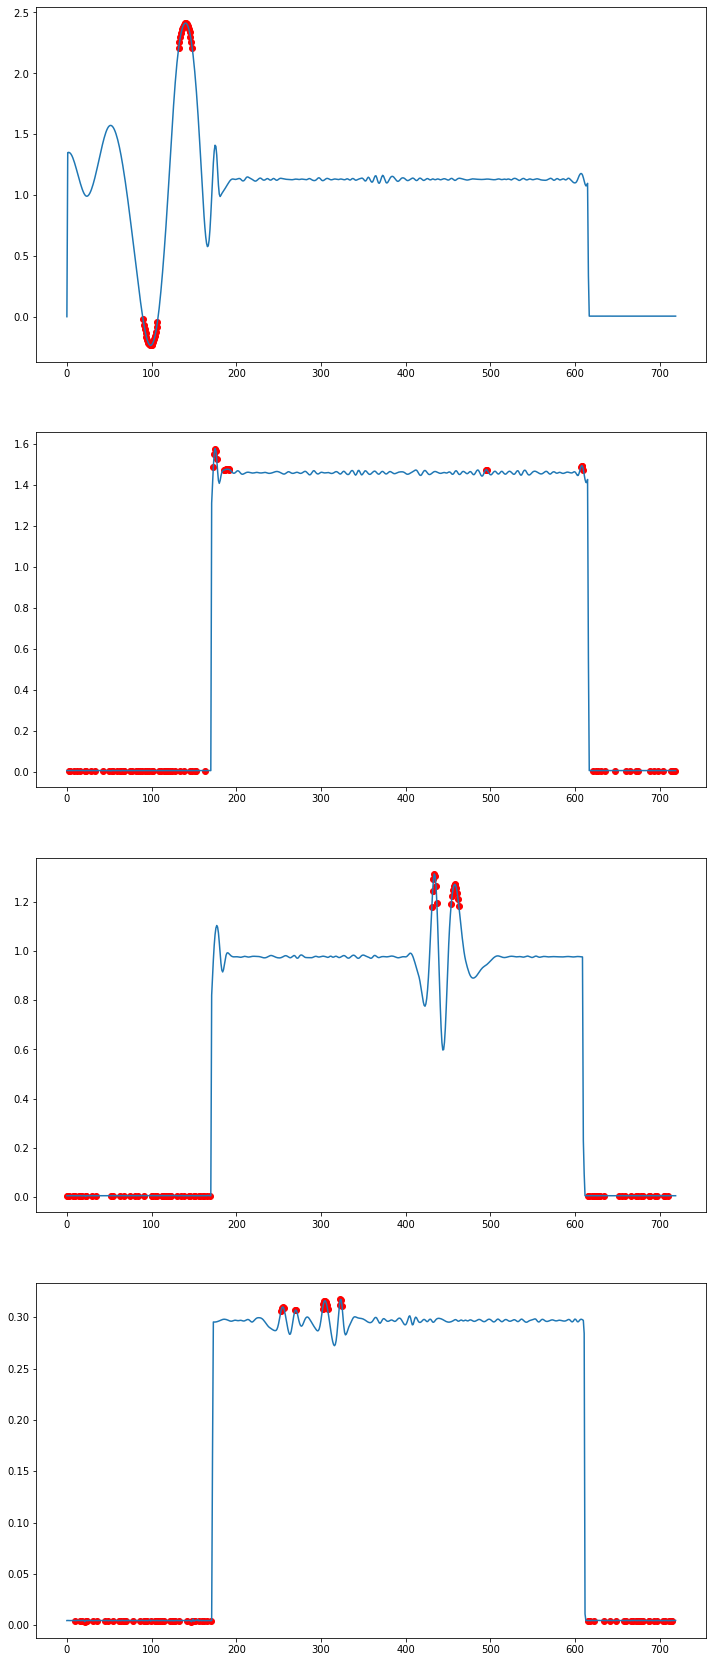

In [34]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(4, 720, 5)


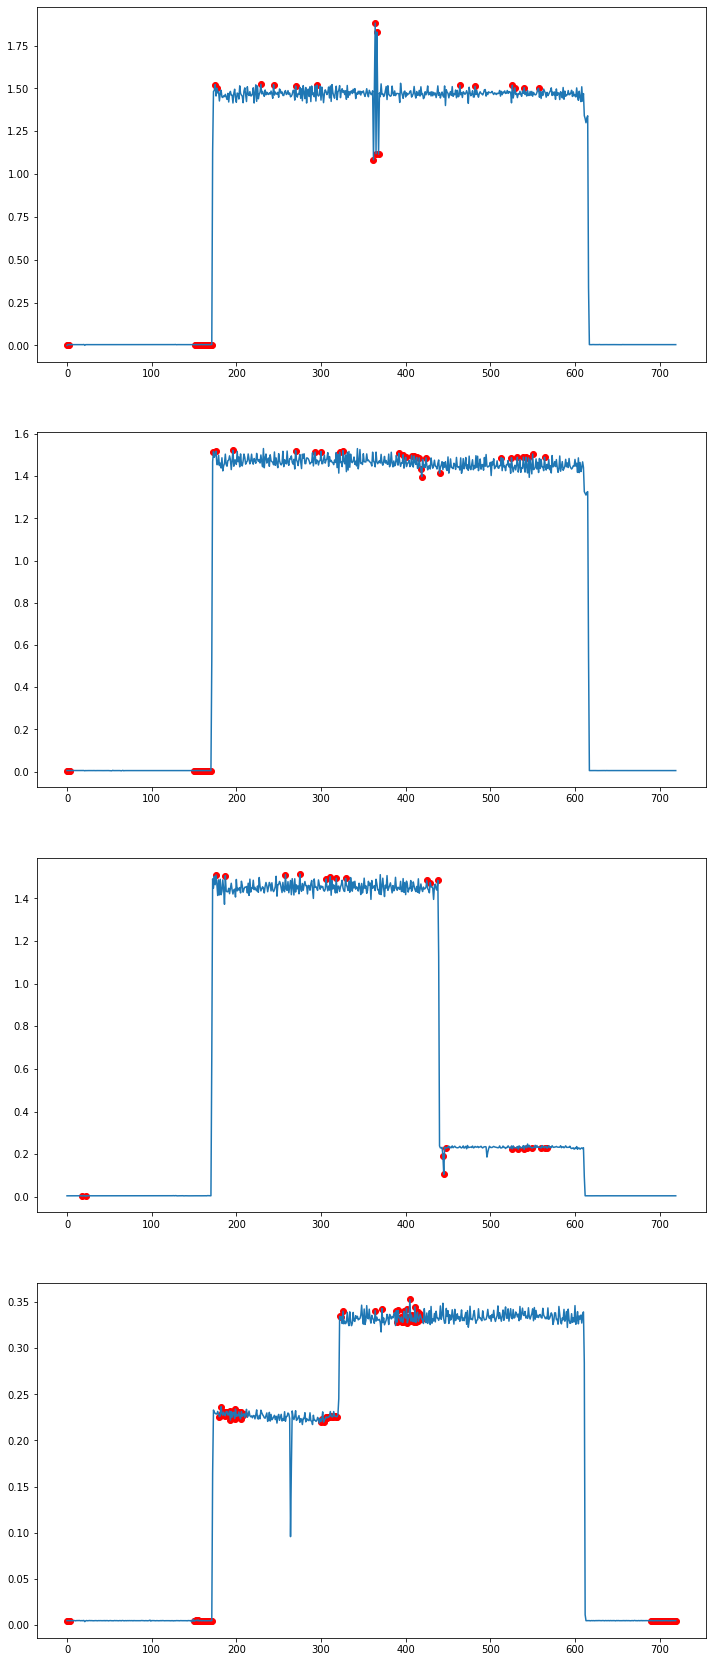

In [35]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

(4, 720, 5)


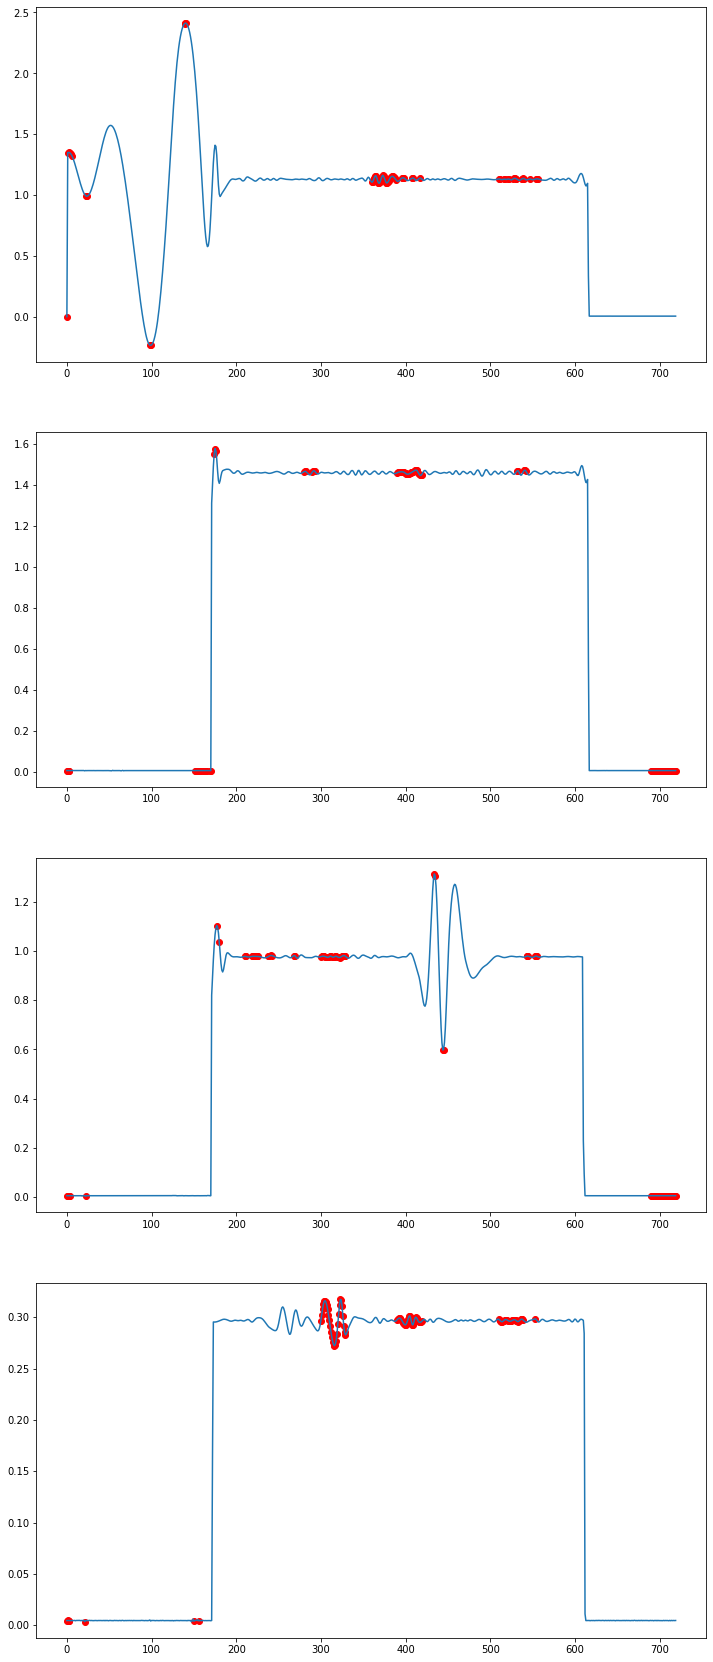

In [36]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[ 756 1473 2189]
756 1473 0
1473 2189 1
(2, 720)
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


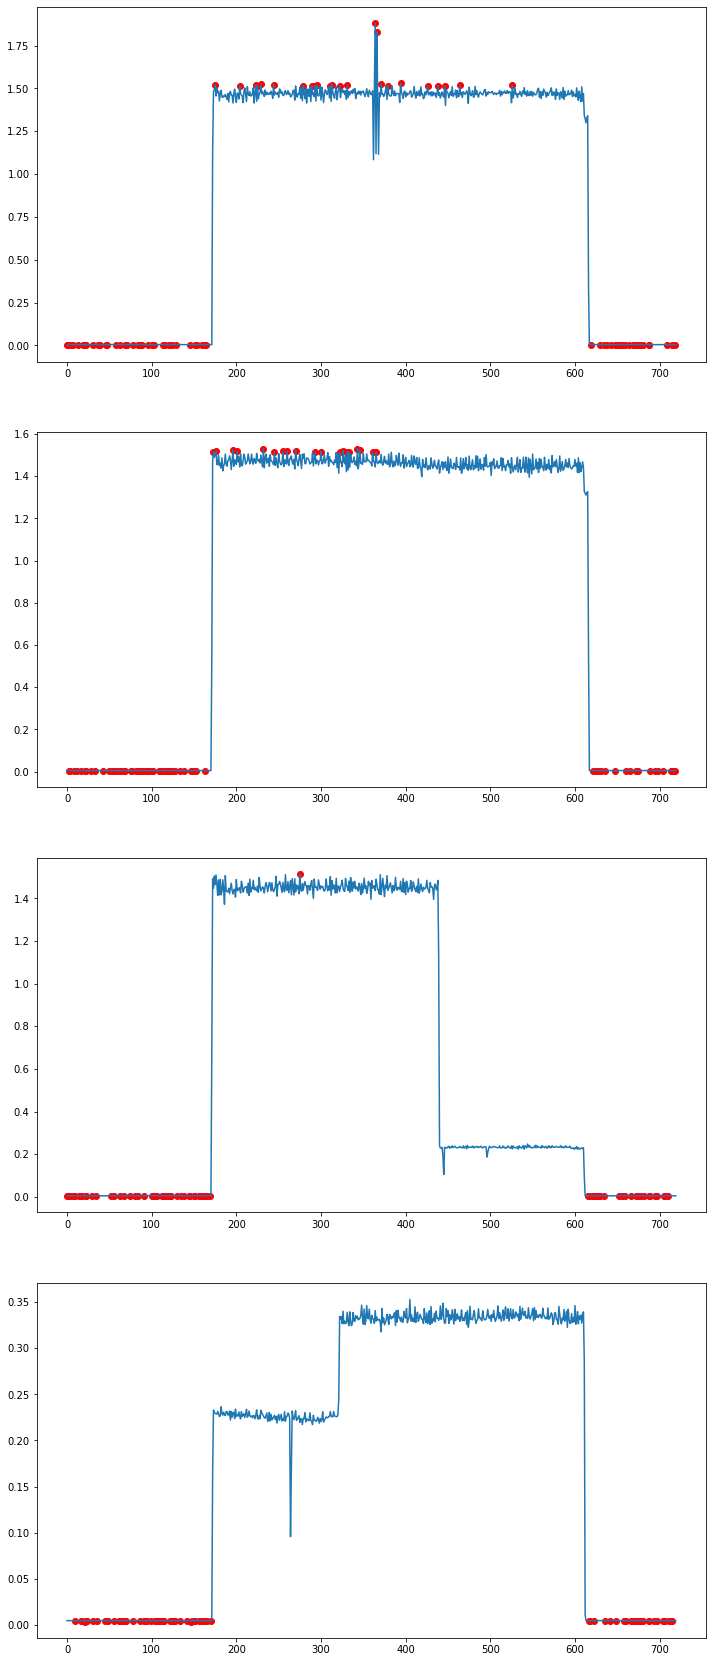

In [37]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


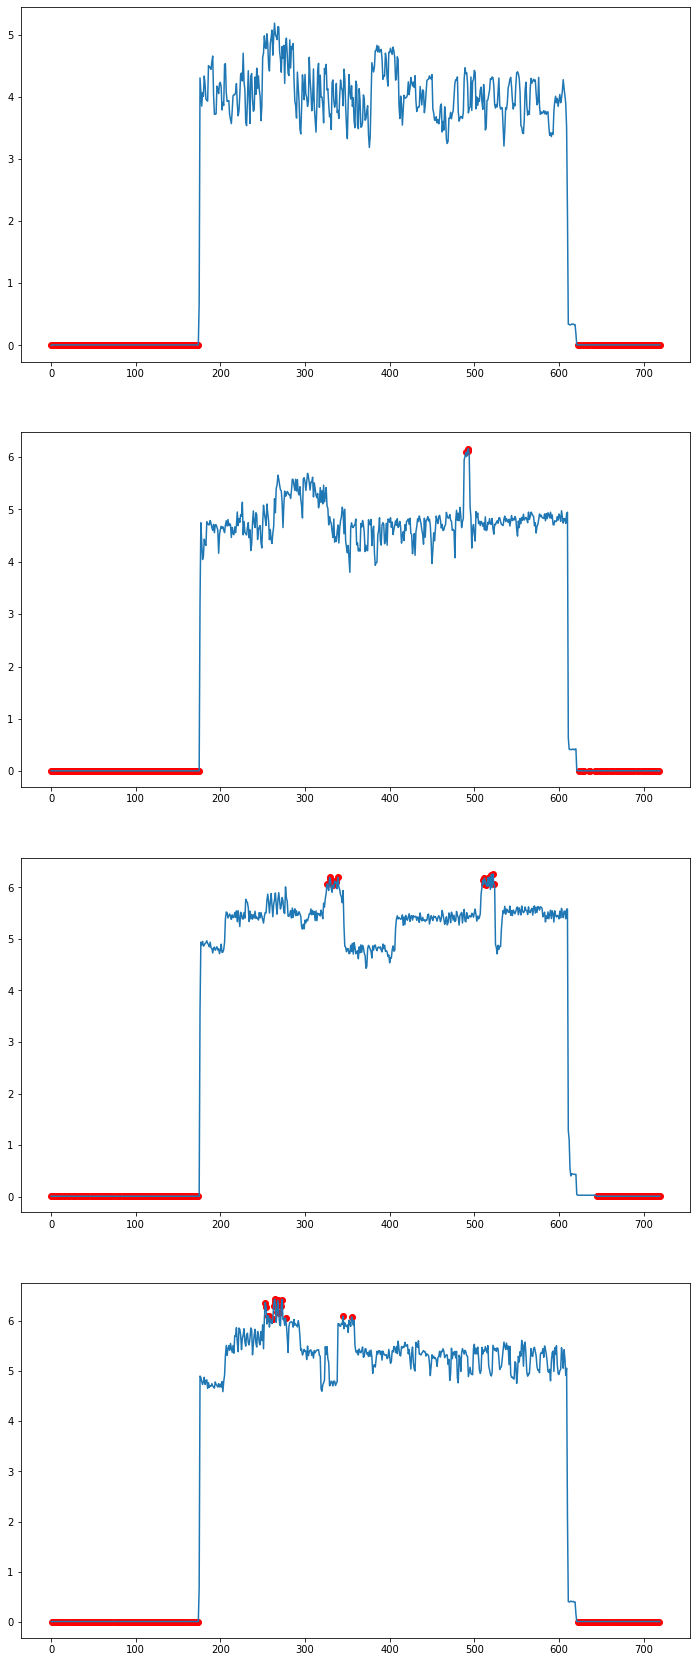

In [36]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
[ 756 1473 2189]
756 1473 0
1473 2189 1
(2, 720)
1473
0 1473


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


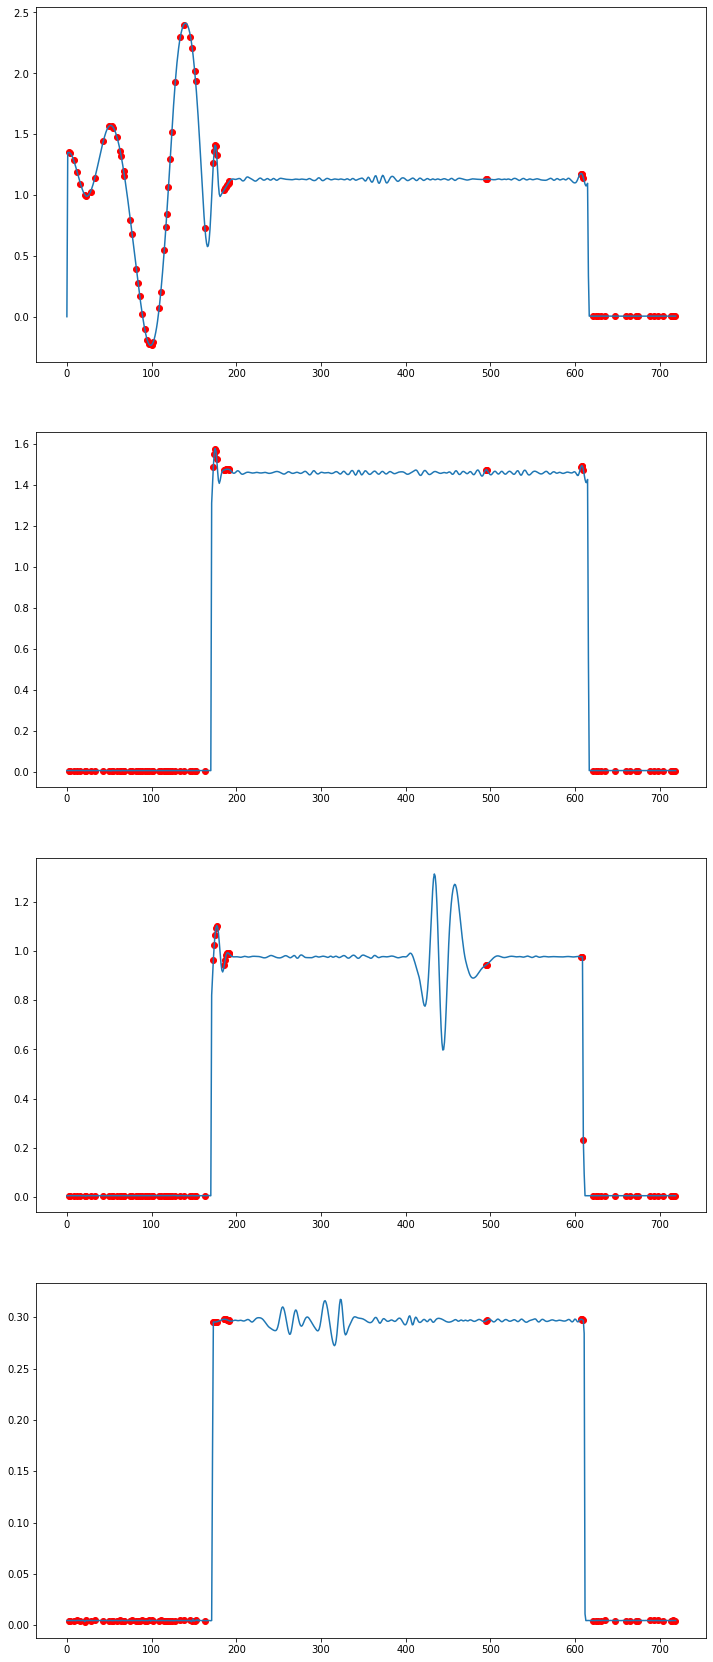

In [38]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

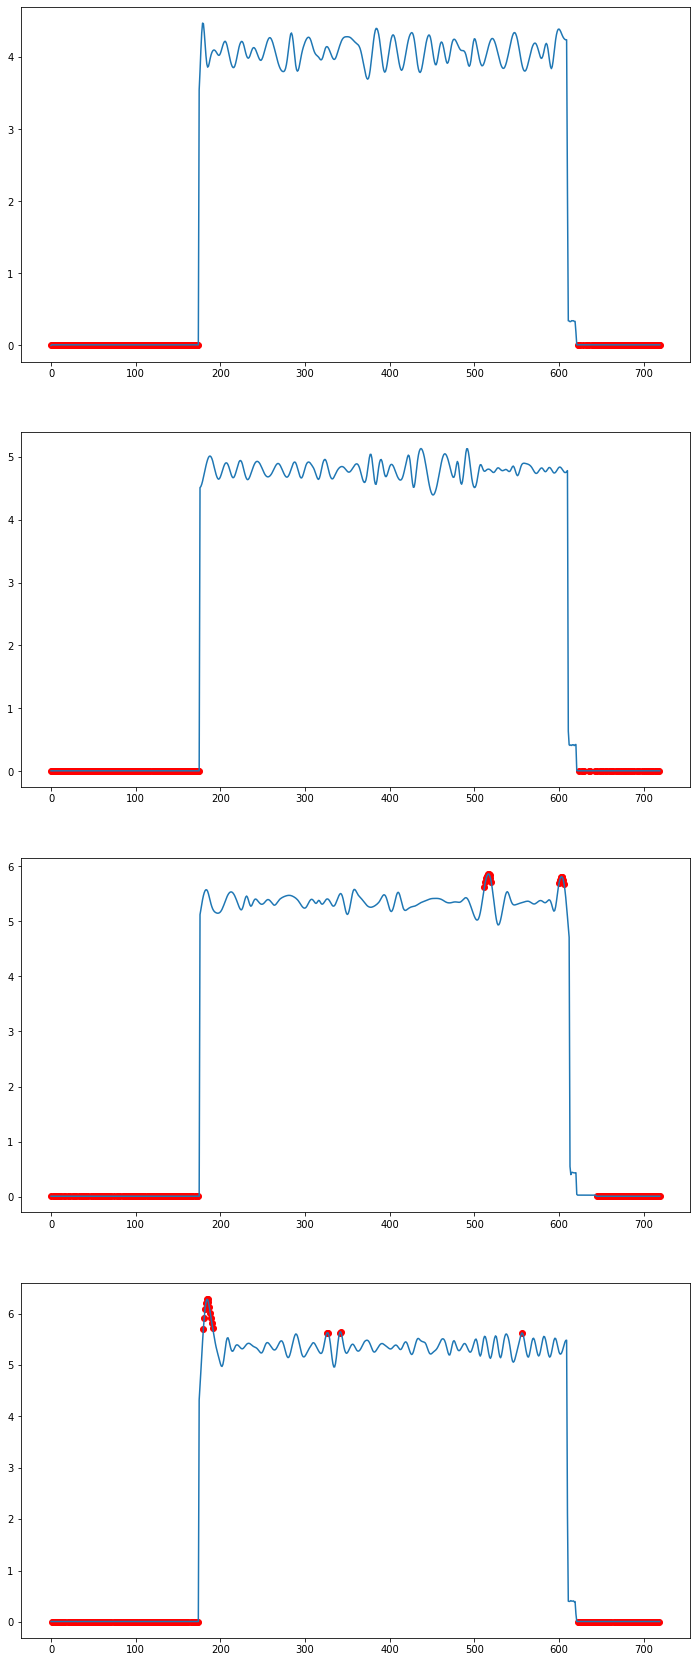

In [38]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


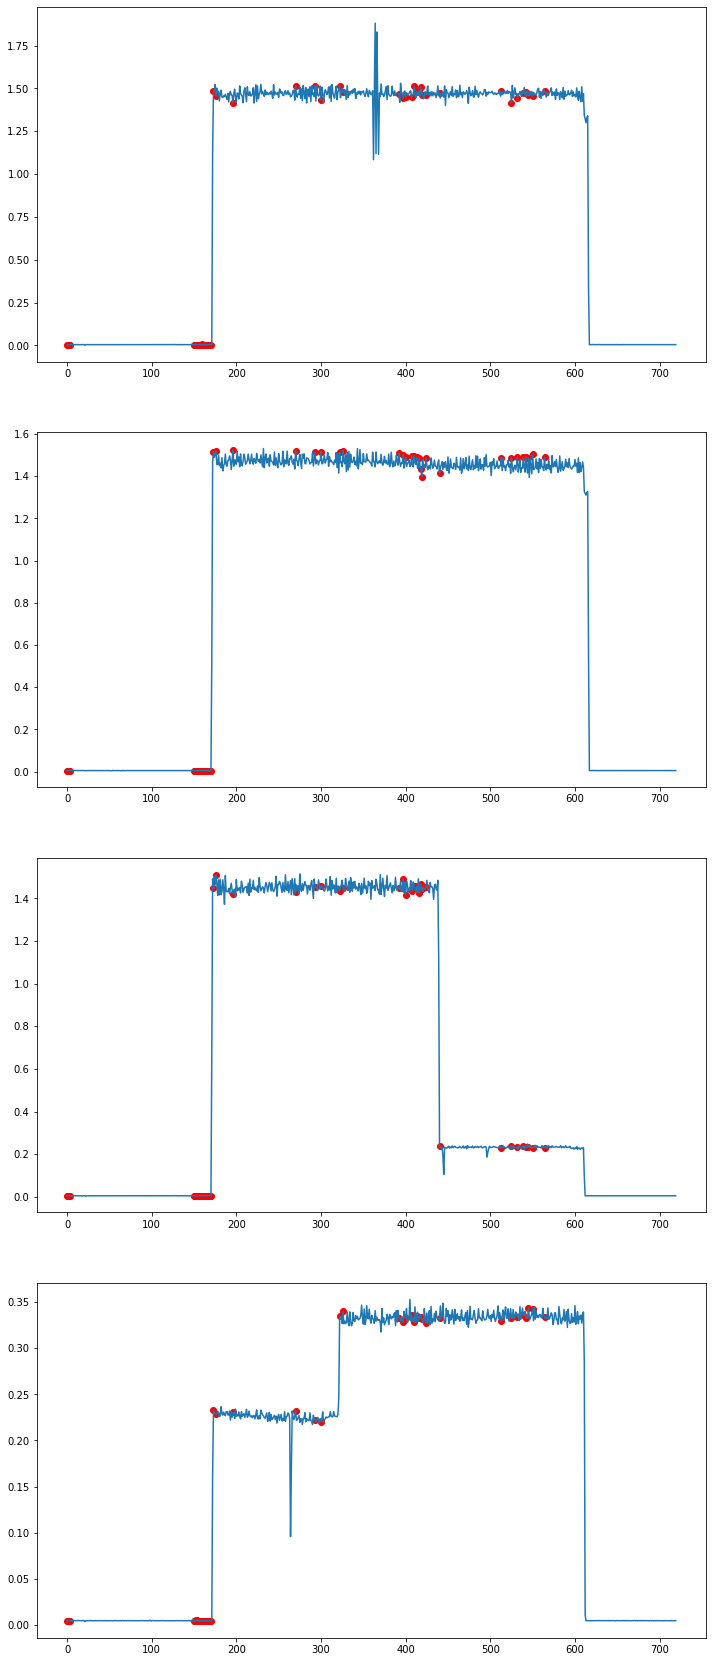

In [40]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
1473
0 1473


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


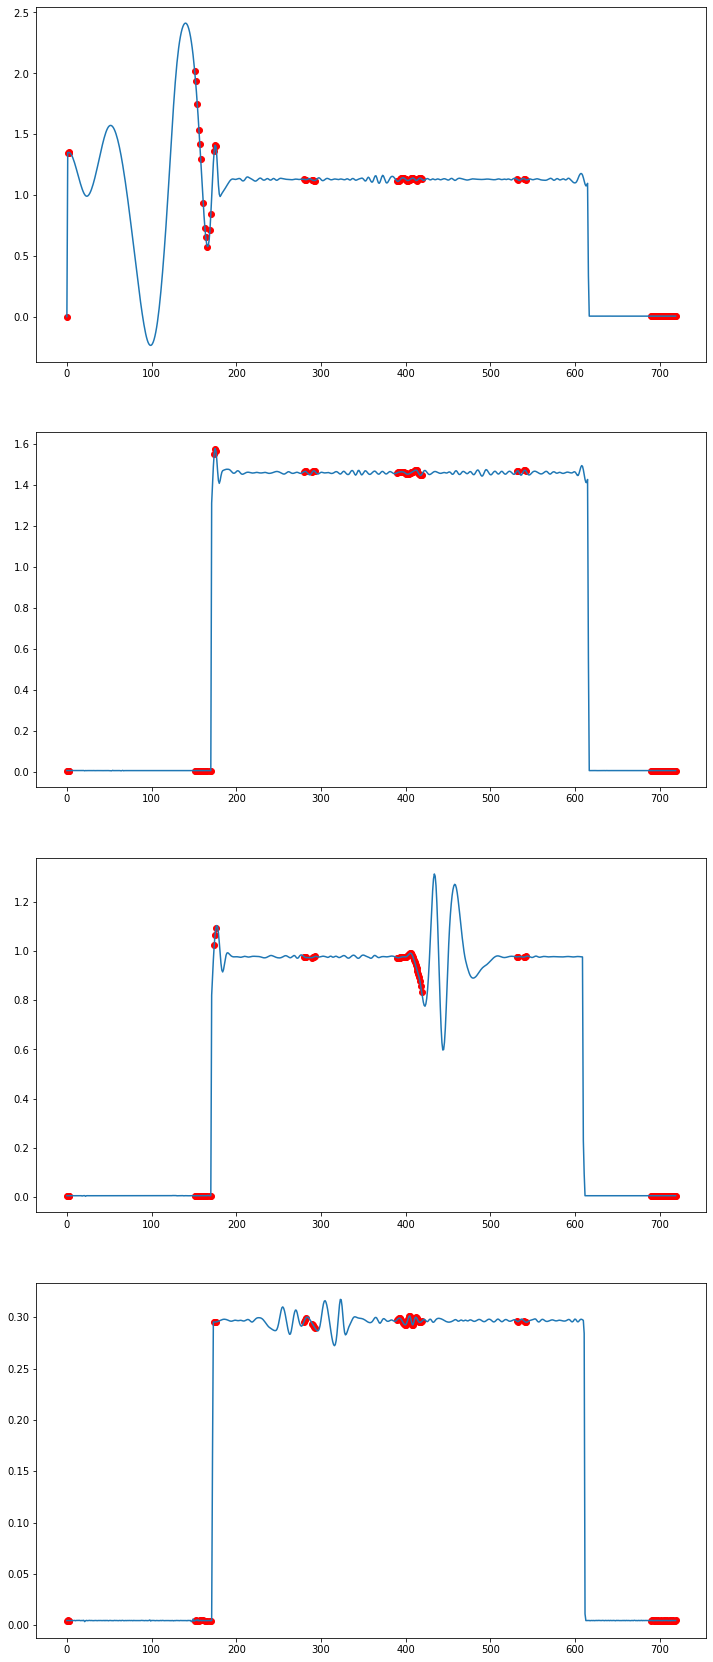

In [41]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 2)
Трейн на норм

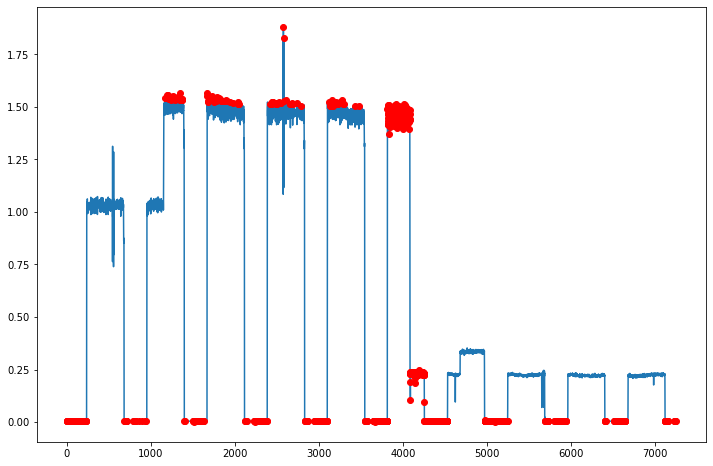

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 5)
Трейн на норм

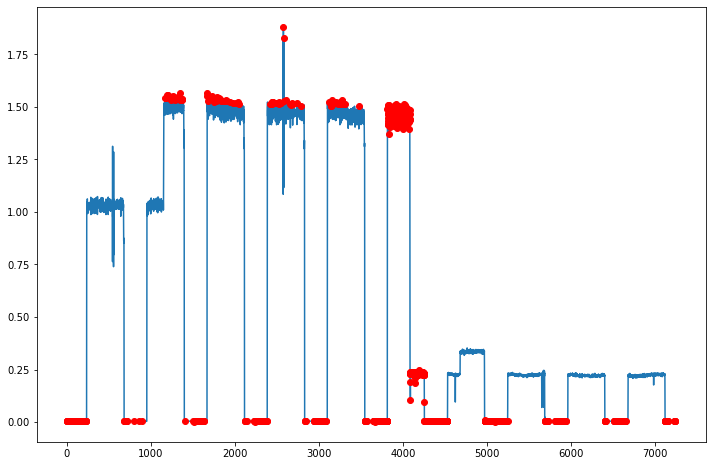

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 15)
Трейн на норм

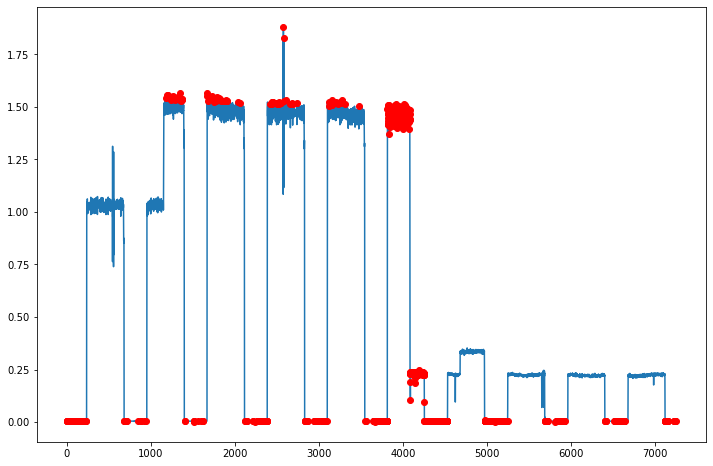

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


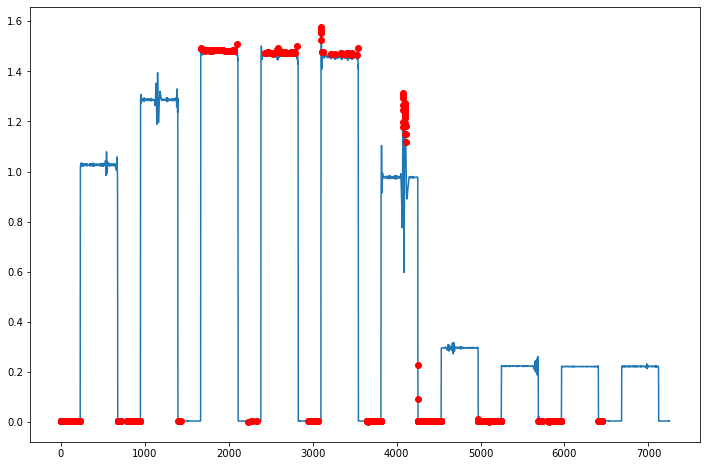

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


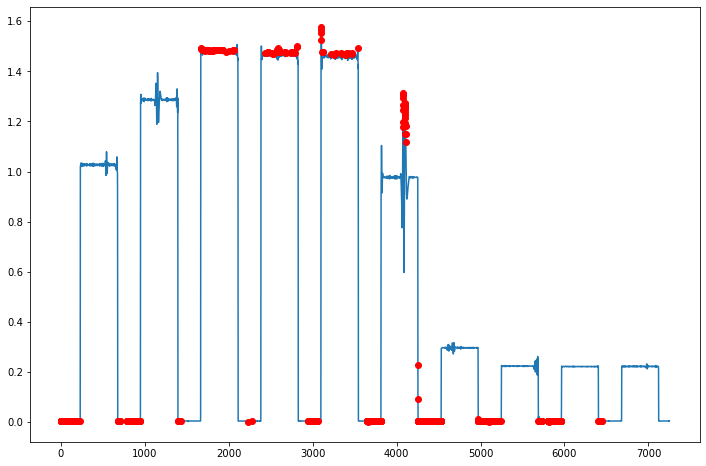

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


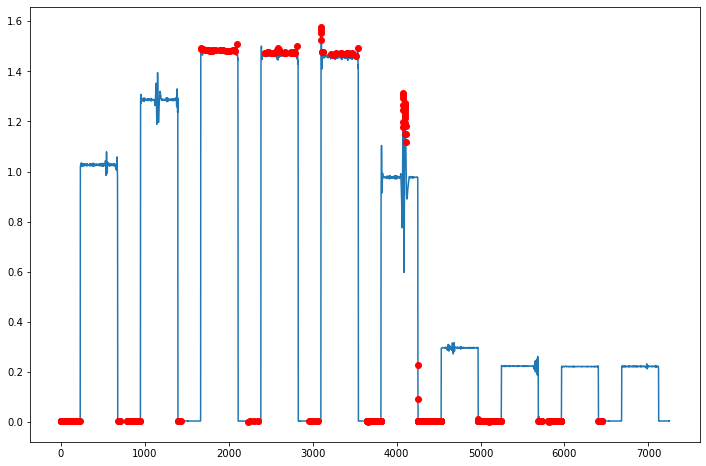

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
for i in range(len(df)):
    df[i] = np.array(df[i])
print(df.shape)
df = np.array(df)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[  65  783 2216 2933 3649]
SMALL
3651
720
BIG
721
SMALL
3651
720
SMALL
3651
718
(4,)


/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:255: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:255: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


[  65  783 2216 2933 3649]
SMALL
3651
720
BIG
721
SMALL
3651
720
SMALL
3651
718


ValueError: setting an array element with a sequence.